# Mall Customer Spending Score Prediction Project
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory Data Analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

### About
Customer's spending their income portion to purchase things from Mall. 
This behaviour of customer helps mall owner to give discount and attract consumer.

## 1) Problem statement.

* Given certain set of feature such as (CustomerID, Gender, Age, Annual Income (k$) and Spending Score (1 - 100).
* The goal is to predict the “Spending Score” using the other columns.

**In this project we are going to use the data given to build a Regressor model:**

* This model is to check if customer spend how much based on the given dataset.
* This can be used to Predict customer spending score (1 - 100) based on the certain criteria which influences the decision.

## 2) Data Collection.
* The Dataset is mall customer data
* The data consists of 200 Rows and 5 Columns

https://www.kaggle.com/code/vigneshwarsofficial/clustering-mall-customers-based-on-their-spending/input?select=Mall_Customers.csv

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [35]:
df = pd.read_csv(r"Mall_Customers.csv")

**Show Top 5 Records**

In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Shape of the dataset**

In [37]:
df.shape

(200, 5)

**Summary of the dataset**

In [38]:
# Display summary statistics for a dataframe
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Check Datatypes in the dataset**

In [39]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3. EXPLORING DATA

In [40]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

We have 1 categorical features : ['Gender']


In [41]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64
---------------------------


**Insights**
 - `CustomerID` have unique vlaues for each column which can be dropped as it it of no importance
 - `Gender` column is highly biased towards female.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Features

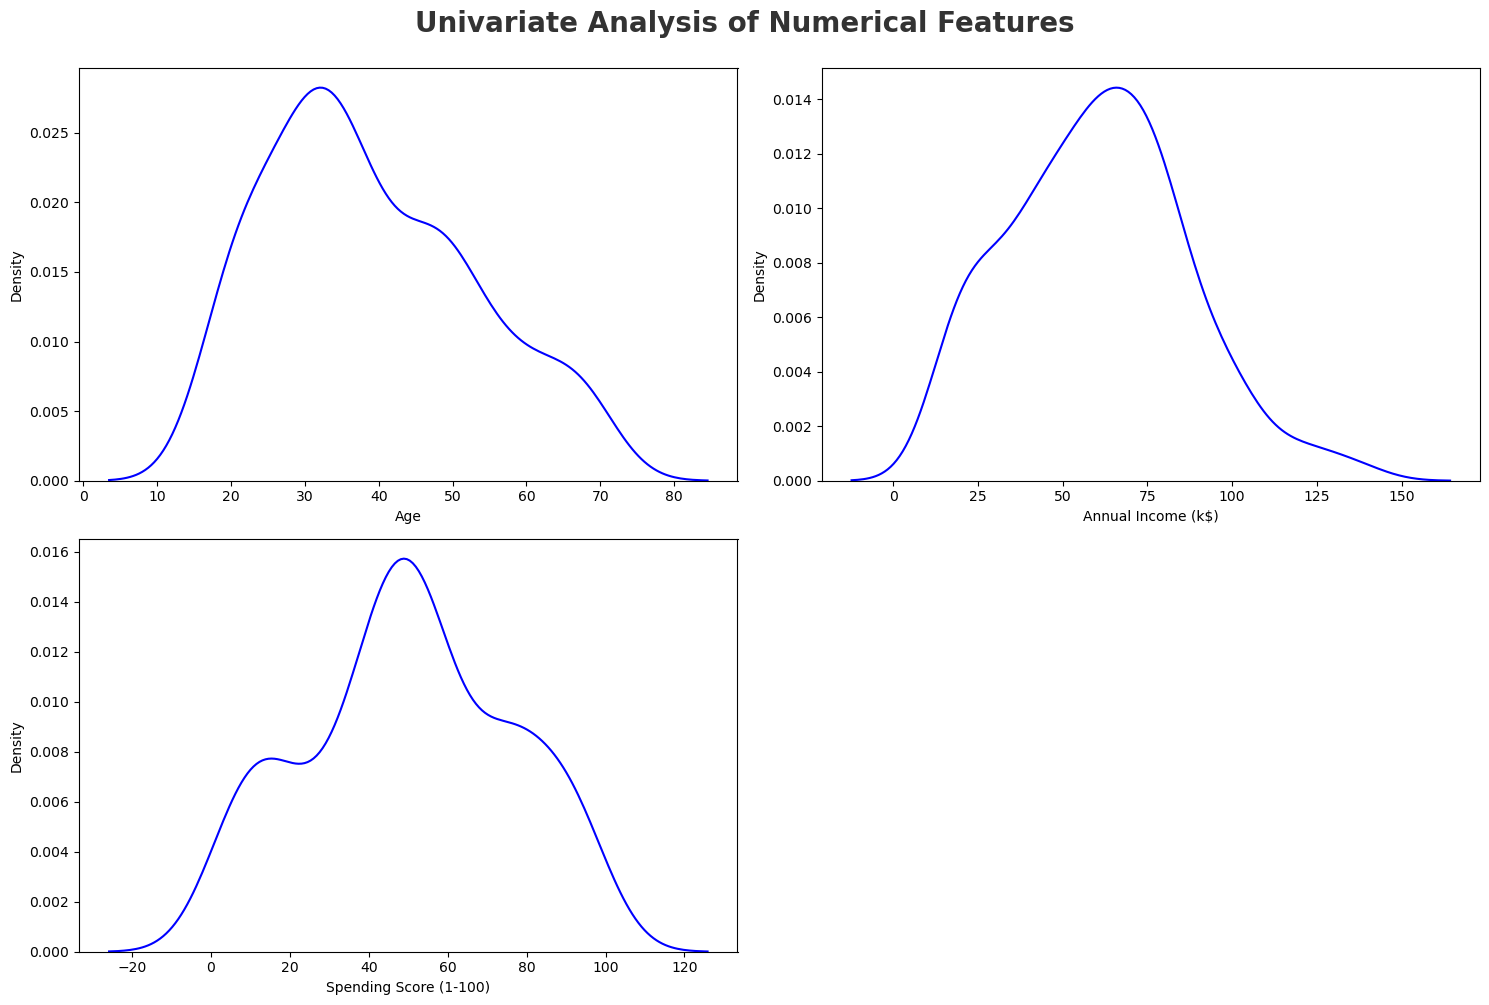

In [42]:
numeric_features.remove('CustomerID')
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insights**
 - `Annual Income (k$)` .
 - `Spending Score (1-100)` 

### Categorical Features

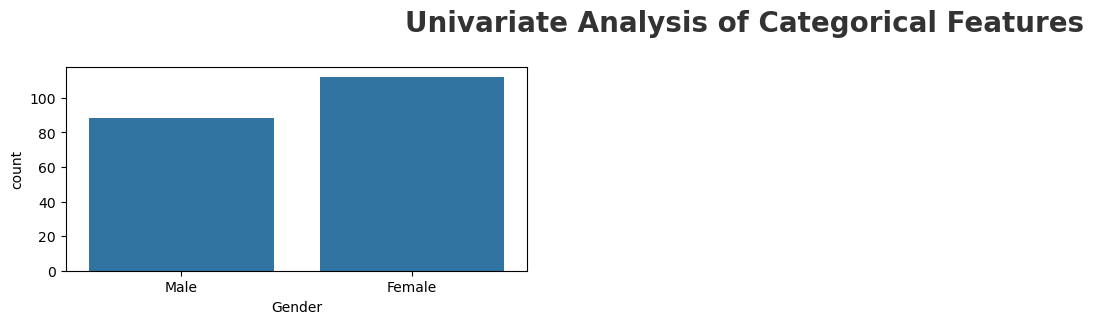

In [43]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

**Insights**
 - `Gender` coulmns have Female slightly dominating.
 - In rest of the columns are balanced.

### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [44]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']


### Check Multicollinearity in Numerical features

In [45]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Insights**
 - There is no multicollinearity between any variables

### Checking Null Values

In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Initial Analysis Report

* **There are No missing values in the dataset.**
* **The `CustomerID` column can be deleted because each row has unique values.**
* **The `Spending Score (1-100)` column is the target to predict.**
* **In the Categorical column, features can be made Binary numerical in feature Encoding**

## 4. Visualization

### 4.1 Visualize the Target Feature

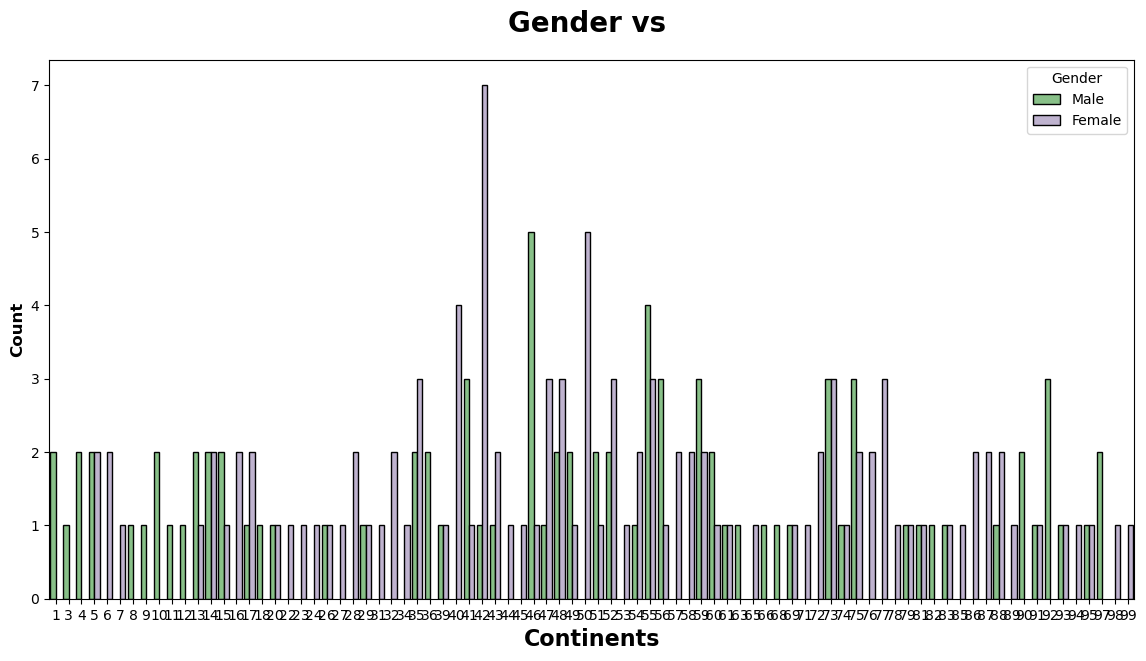

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Spending Score (1-100)",hue="Gender", data=df, ec = "black",palette="Accent")
plt.title("Gender vs ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Gender")
plt.show()

In [48]:
df2 = df.copy()

### 4.3 Does Gender has any impact on Spending ?

In [49]:
#group data by Education and their count of case_status
df.groupby('Gender')['Spending Score (1-100)'].value_counts(normalize=True).to_frame()*100

proportion
Gender Spending Score (1-100)            
Female 42                        6.250000
       50                        4.464286
       40                        3.571429
       35                        2.678571
       47                        2.678571
...                                   ...
Male   83                        1.136364
       88                        1.136364
       91                        1.136364
       93                        1.136364
       95                        1.136364

[120 rows x 1 columns]

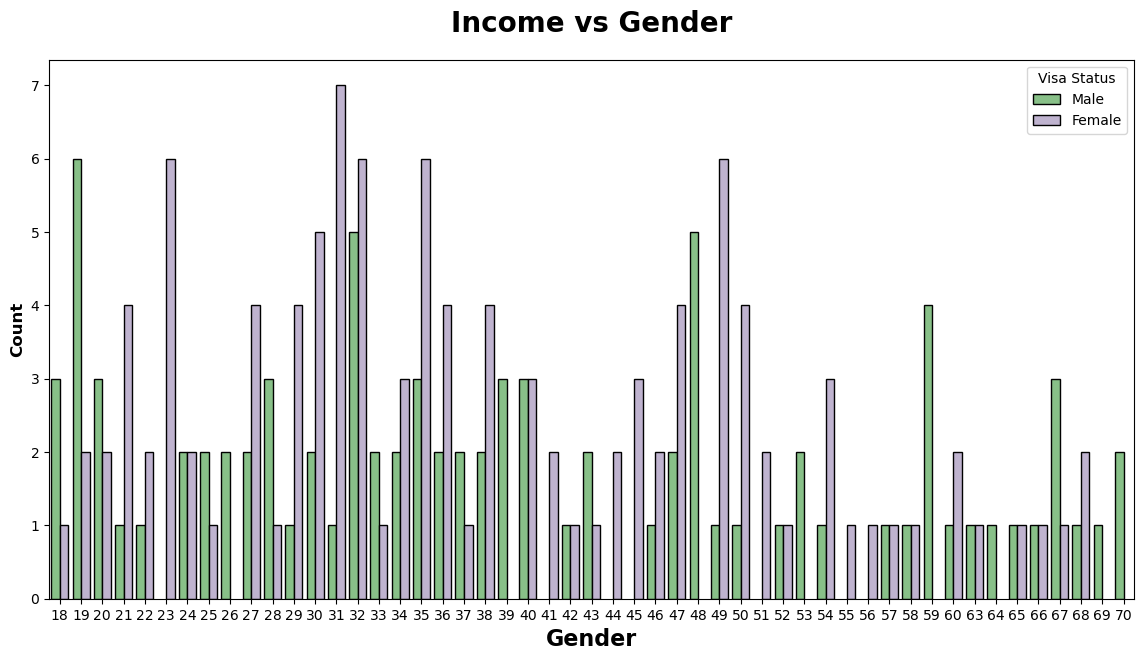

In [50]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Age",hue="Gender", data=df, ec = "black",palette="Accent")
plt.title("Income vs Gender", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

**Insights**
- Gender has high impact
- `Female` and `Middle income` have higher spending then the others.

### Final Report 
* `CustomerID` column can be dropped as it is an ID.

In [51]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################